# Import Library

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Disable all alerts
warnings.filterwarnings("ignore")


In [2]:
# import dataset
data_model = pd.read_csv('train.csv', sep=',')
data_predict = pd.read_csv('test.csv', sep=',')
submission_data = pd.read_csv('sample_submission.csv', sep=',')

# To See and Understanding Datasets

In [3]:
# the data to be trained
data_model.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [4]:
# the data to be predicted
data_predict.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [5]:
# expected output
submission_data.head()

,id,Calories
0,750000,88.283
1,750001,88.283
2,750002,88.283
3,750003,88.283
4,750004,88.283


## data information

-- to see how many numerical data and categorical data.
-- to see data dimension
-- to see null values

In [6]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [7]:
data_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [8]:
# view the dimensions of train and test data
print("data_model shape: ", data_model.shape)
print("data_predict shape: ", data_predict.shape)
print("submission_data: ", submission_data.shape)

data_model shape:  (750000, 9)
data_predict shape:  (250000, 8)
submission_data:  (250000, 2)


# Check Null Values

In [9]:
# search for columns with empty values
# data_model
missing_cols = data_model.columns[data_model.isna().any()]
print("Missing values in data_model: ", missing_cols)

# data_predict
missing_col = data_predict.columns[data_predict.isna().any()]
print("Missing values in data_predict: ", missing_col)

Missing values in data_model:  Index([], dtype='object')
Missing values in data_predict:  Index([], dtype='object')


In [10]:
# missing values in the data_model & data_predict
print('calories null value: ', data_model['Calories'].isnull().sum())
print('body temp null value: ', data_predict['Body_Temp'].isnull().sum())

calories null value:  0
body temp null value:  0


# EDA (Exploration Data Analysis)

## Descriptive Statistics for train and test data

In [11]:
data_model.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
data_model.describe(include='object')

,Sex
count,750000
unique,2
top,female
freq,375721


In [13]:
# calculate the percentage of each unique value in "Sex"
data_model['Sex'].value_counts(normalize=True)

Sex
female    0.500961
male      0.499039
Name: proportion, dtype: float64

## EDA with Data Visualization

In [14]:
# create pipelines for train and test data visualization (pairplot, catplot, boxplot, and heatmap)
# Visualization functions

num_data = data_model.select_dtypes(include='number').drop(columns='id')

def plot_pairplot(data):
    sns.pairplot(data)
    plt.show()

def plot_catplot(data, x, kind='count'):
    plt.figure(figsize=(4,3))
    sns.catplot(x=x, data=data, kind=kind)
    plt.show()

def plot_boxplot(data):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data)
    plt.show()

def plot_heatmap(data):
    plt.figure(figsize=(8, 4))
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()

Data Model Pairplot


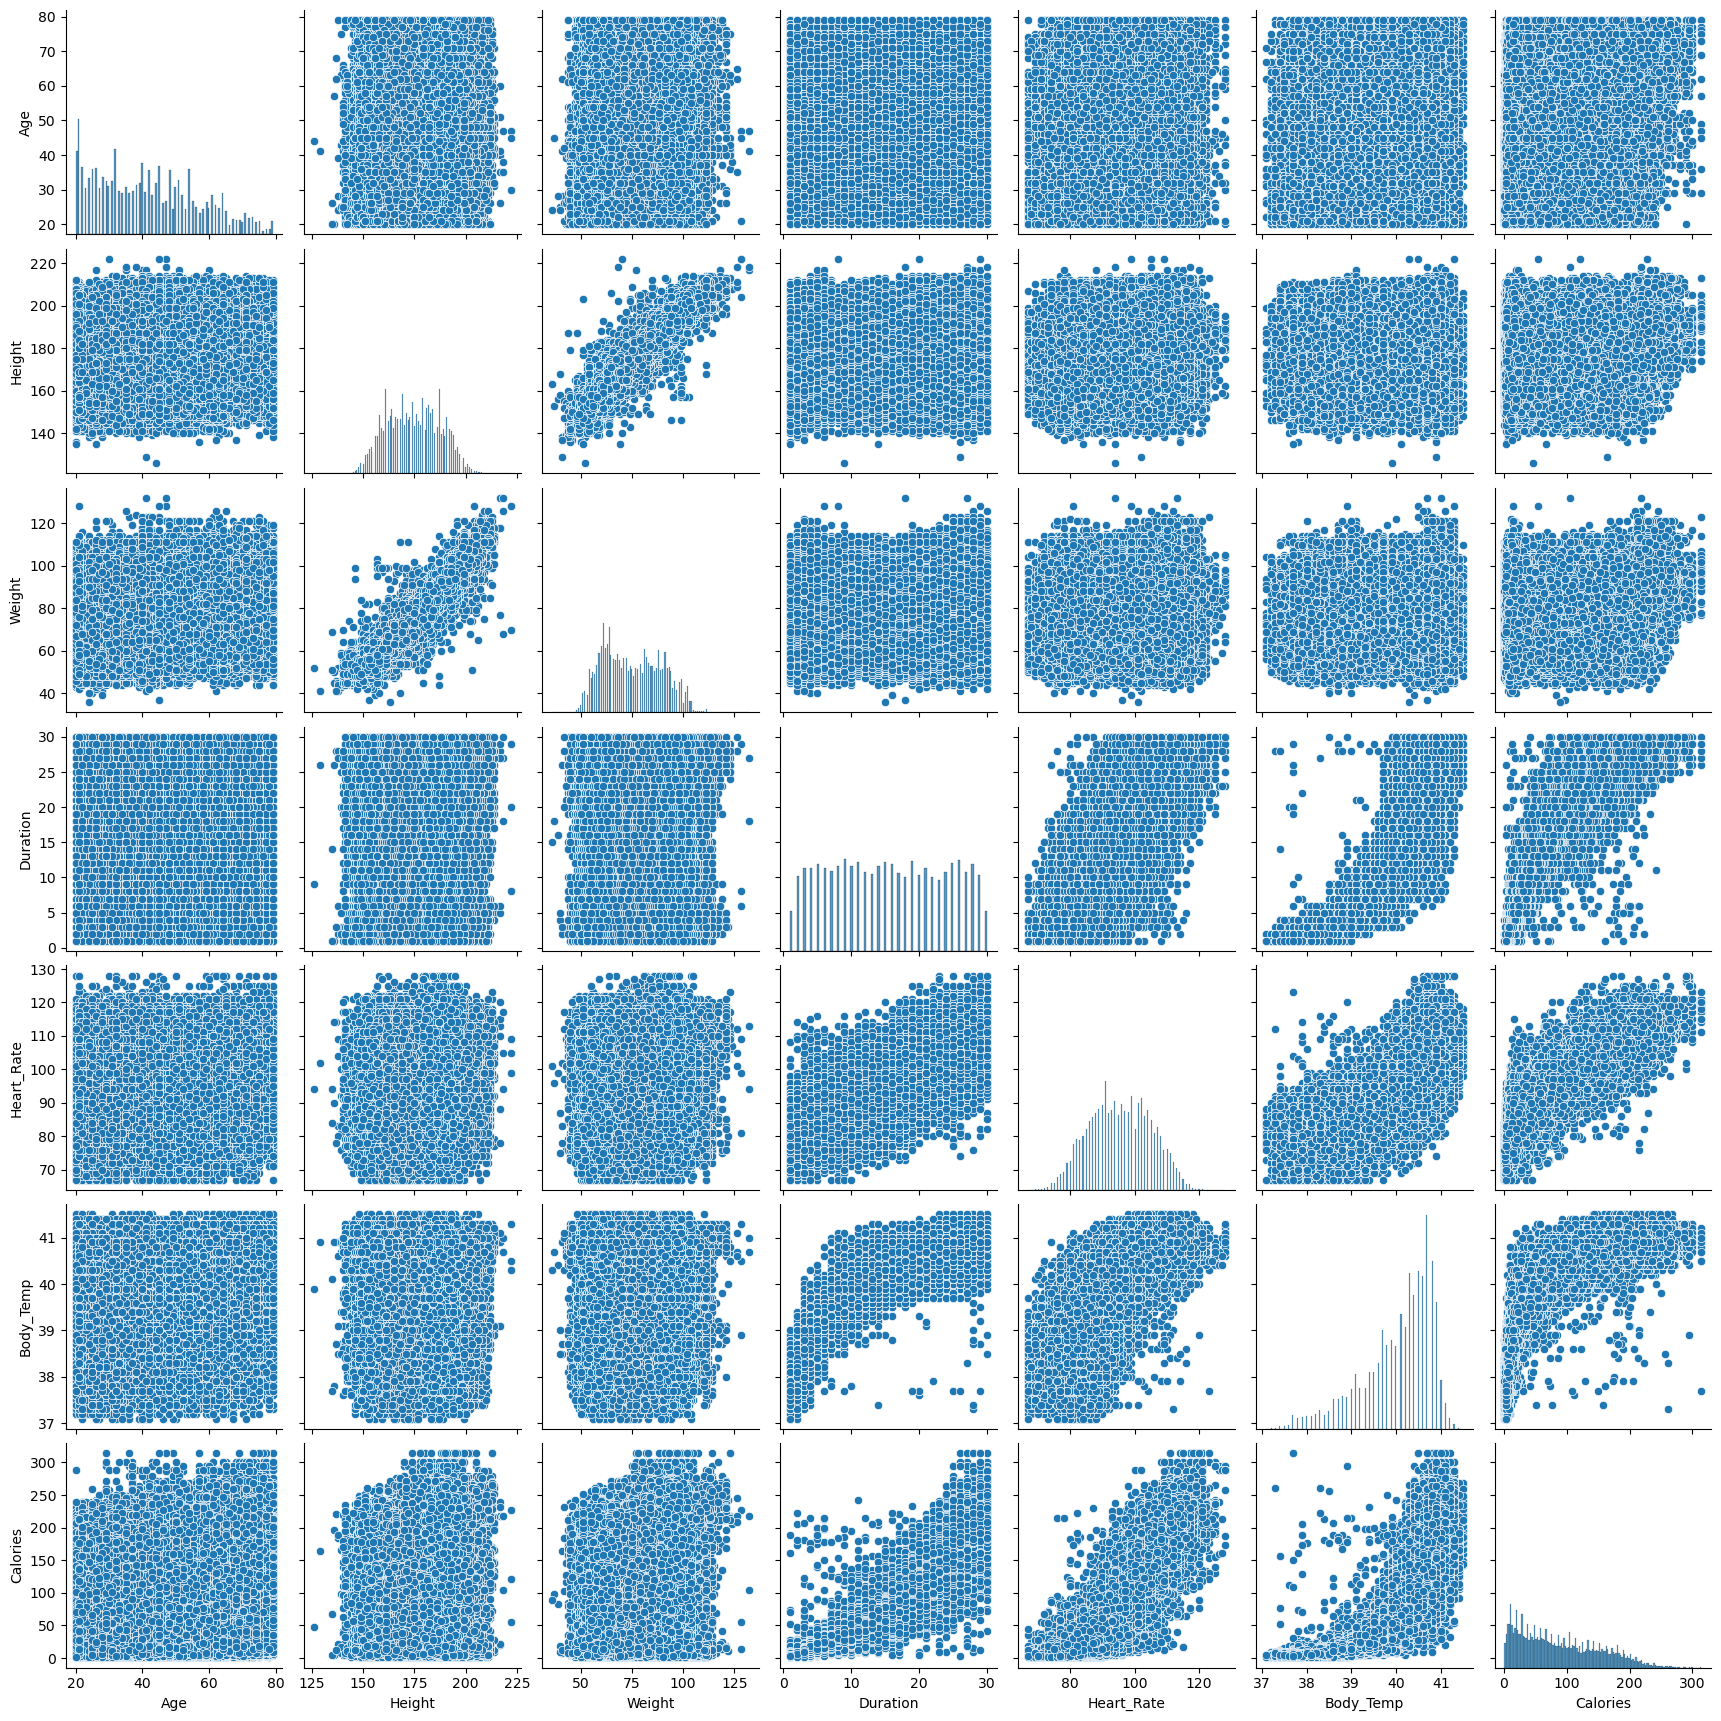

In [15]:
# pairplot to see the data distribution
print("Data Model Pairplot")
plot_pairplot(num_data)

Based on the pair plot, it can be seen that data exploration showed 1 categorical and 7 numerical variables, with the distribution of numerical variables varying: positive skew in age and calories, negative skew in body temperature, the rest were normal.

Data Model Catplot


<Figure size 400x300 with 0 Axes>

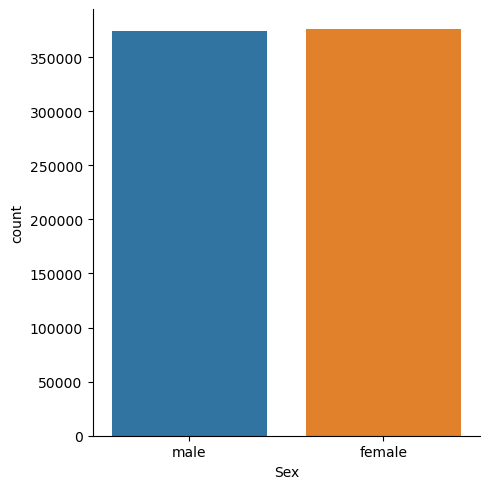

In [16]:
print('Data Model Catplot')
plot_catplot(data_model, 'Sex', kind='count')

The data is well balanced enough to allow for further analysis of Predict Calorie Expenditure.

Data model Boxplot


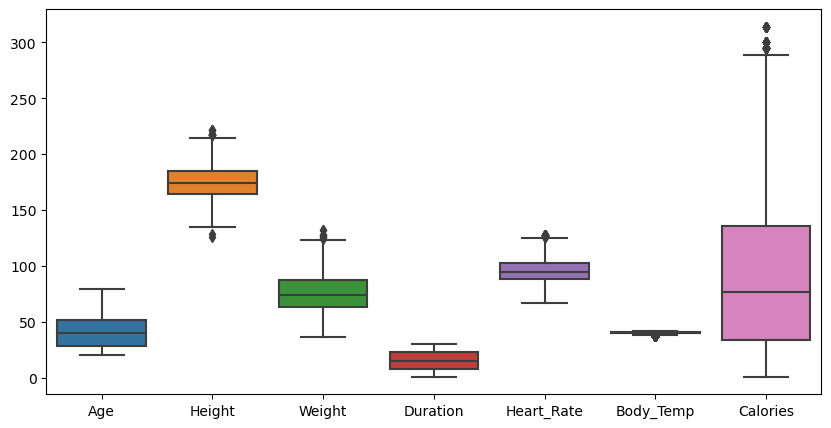

In [17]:
print("Data model Boxplot")
plot_boxplot(num_data)

There were few outliers but here I will not handle the outliers because the outliers data is important enough to see how the output of the anomalous value.

Data Model Heatmap


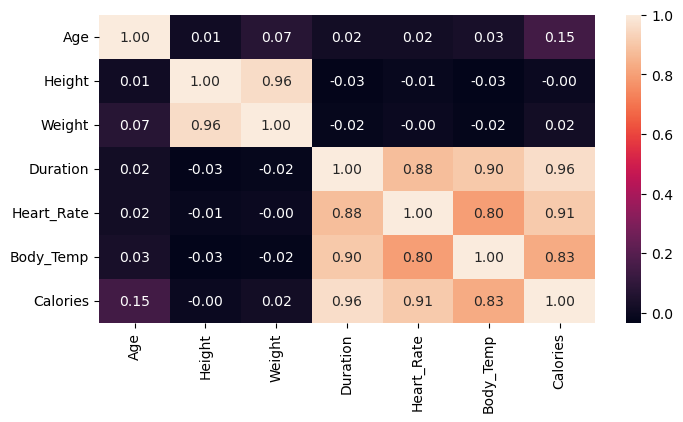

In [18]:
print("Data Model Heatmap")
plot_heatmap(num_data)

Based on the results of measuring the correlation value between variables using boxplots, it can be seen that there are only 3 variables that correlate with the value of 'Calories'. Therefore, to build the machine learning model, these 3 variables will be used as predictor variables. But before building the machine learning model, I will first conduct a correlation test.

## Performing Hypothesist Test

In [19]:
# correlation test with spearman and pearson on the variable 'Calories' against the variables 'Duration', 'Heart_Rate', and 'Body_Temp'

from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Pearson
corr_1, p_value_dur = pearsonr(num_data['Duration'], num_data['Calories'])
corr_2, p_value_hr = pearsonr(num_data['Heart_Rate'], num_data['Calories'])
corr_3, p_value_bt = pearsonr(num_data['Heart_Rate'], num_data['Calories'])

# Spearman
corr_4, p_value_sdur = spearmanr(num_data['Duration'], num_data['Calories'])
corr_5, p_value_shr = spearmanr(num_data['Heart_Rate'], num_data['Calories'])
corr_6, p_value_sbt = spearmanr(num_data['Body_Temp'], num_data['Calories'])

# Print Pearson
print("pearson correlation: \n")
print("P-value Statistic Duration:", p_value_dur)
print("Corr Duration: ", corr_1, '\n')

print("P-value Statistic Heart Rate:", p_value_hr)
print("Corr Duration:", corr_2, '\n')

print("P-value Statistic Body Temp:", p_value_bt)
print("Corr Duration:", corr_3, '\n')

# print spearman
print("spearman correlation: \n")
print("P-value Statistic Duration:", p_value_sdur)
print("Corr Duration:", corr_4, '\n')

print("P-value Statistic Heart Rate:", p_value_shr)
print("Corr Duration:", corr_5, '\n')

print("P-value Statistic Body Temp:", p_value_sbt)
print("Corr Duration:", corr_6, '\n')

pearson correlation: 

P-value Statistic Duration: 0.0
Corr Duration:  0.9599076133828065 

P-value Statistic Heart Rate: 0.0
Corr Duration: 0.908747797337432 

P-value Statistic Body Temp: 0.0
Corr Duration: 0.908747797337432 

spearman correlation: 

P-value Statistic Duration: 0.0
Corr Duration: 0.9808590087222785 

P-value Statistic Heart Rate: 0.0
Corr Duration: 0.9274630568428336 

P-value Statistic Body Temp: 0.0
Corr Duration: 0.9337700934870466 



In [20]:
alpha = 0.05
if p_value_dur < alpha:
    print("Reject the null hypothesis (H0), there is a significant relationship between Calories and 3 other parameters.")
else:
    print("Failed to reject the null hypothesis (H0), there is no significant relationship between Calories and 3 other parameters.")

Reject the null hypothesis (H0), there is a significant relationship between Calories and 3 other parameters.


# Data Preprocessing

## split train and test data

In [21]:
# Importing linear regression libraries from sklearn and train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
# define predictor and target variables

# variable predictor (X)
X = data_model.drop(columns=['Calories'])
# target (y)
y = data_model['Calories']

# determine the size of train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## separating numeric and categorical data

In [23]:
X_model = X_train.select_dtypes(include='number').drop(columns=['id', 'Age', 'Height', 'Weight'])
Xt_model = X_test.select_dtypes(include='number').drop(columns=['id', 'Age', 'Height', 'Weight'])

In [24]:
# Data Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
# Standard scaler for X_train
Xtrain = scaler.fit_transform(X_model)
Xtrain = pd.DataFrame(Xtrain, columns=X_model.columns)

# Standard scaler for X_test
Xtest = scaler.fit_transform(Xt_model)
Xtest = pd.DataFrame(Xtest, columns=Xt_model.columns)

# Standard scaler for y_train
ytrain = scaler.fit_transform(y_train.values.reshape(-1, 1))
ytrain_ = pd.DataFrame(ytrain, columns=['Calories'])

# Standar scaler for y_test
ytest = scaler.fit_transform(y_test.values.reshape(-1, 1))
ytest_ = pd.DataFrame(ytest, columns=['Calories'])

In [26]:
print("see the dimensions of the data before it is scaled: ")
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape, '\n')

print("see the dimensions of the data after it is scaled: ")
print('Xtrain shape: ', Xtrain.shape)
print('Xtest shape: ', Xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ', ytest.shape)

see the dimensions of the data before it is scaled: 
X_train shape:  (600000, 8)
X_test shape:  (150000, 8)
y_train shape:  (600000,)
y_test shape:  (150000,) 

see the dimensions of the data after it is scaled: 
Xtrain shape:  (600000, 3)
Xtest shape:  (150000, 3)
ytrain shape:  (600000, 1)
ytest shape:  (150000, 1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


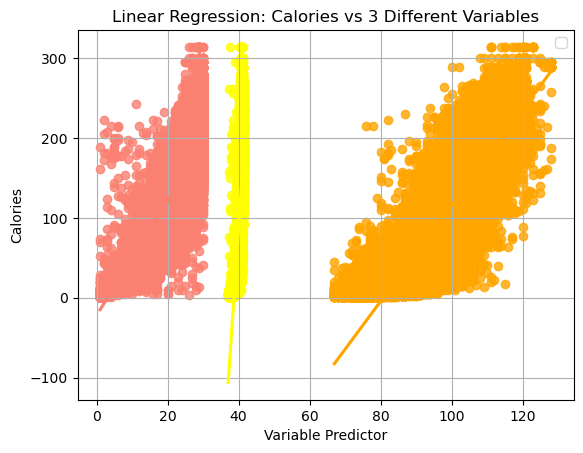

In [27]:
# Original data plot
sns.regplot(data=data_model, x="Duration", y="Calories", color='salmon')
sns.regplot(data=data_model, x="Heart_Rate", y="Calories", color='orange')
sns.regplot(data=data_model, x="Body_Temp", y="Calories", color='yellow')

plt.xlabel('Variable Predictor')
plt.ylabel('Calories')
plt.title('Linear Regression: Calories vs 3 Different Variables')
plt.legend()
plt.grid(True)
plt.show()


# Build Model Regression

## Linear Regression

In [28]:
# building model linear regression
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [29]:
# calculate coefficient and intercept
print('coefisien:', model.coef_)
print('intercept:', model.intercept_)

coefisien: [[ 0.89366018  0.29862241 -0.21618092]]
intercept: [-2.86683044e-15]


In [30]:
# calculate mse for evaluation of linear regression results
from sklearn.metrics import mean_squared_error
y_pred = model.predict(Xtest)
mse = mean_squared_error(ytest, y_pred)
print('mse:', mse)

mse: 0.049818910411653816


In [31]:
# calculate the R square value (Coeficient Determination)
from sklearn.metrics import r2_score
r2 = r2_score(ytest, y_pred)
print('r2_square:', r2)

r2_square: 0.9501810895883462


The evaluation results of the linear regression model have very good performance. R-squared (R²): A value of 0.950 indicates that about 95% of the variability in the target variable (Calories) can be explained by the predictor variables used in the model. Mean Squared Error (MSE): The value of 0.004982 is very small, which indicates that the average prediction error is also very low.

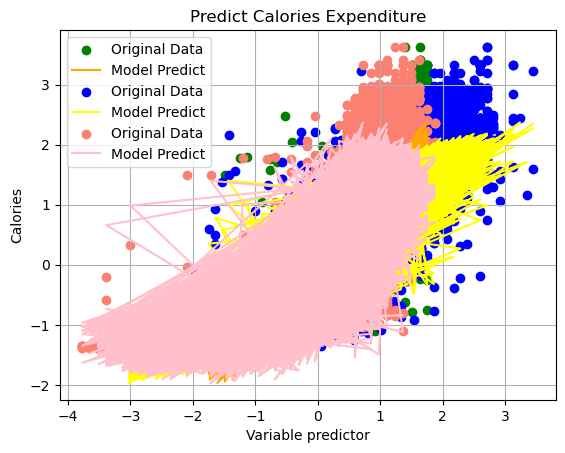

In [32]:
# Plot data test & predict
plt.scatter(Xtest['Duration'], ytest, color='green', label='Original Data')
plt.plot(Xtest['Duration'], y_pred, color='orange', label='Model Predict')
plt.scatter(Xtest['Heart_Rate'], ytest, color='blue', label='Original Data')
plt.plot(Xtest['Heart_Rate'], y_pred, color='yellow', label='Model Predict')
plt.scatter(Xtest['Body_Temp'], ytest, color='salmon', label='Original Data')
plt.plot(Xtest['Body_Temp'], y_pred, color='pink', label='Model Predict')

plt.xlabel('Variable predictor')
plt.ylabel('Calories')
plt.title('Predict Calories Expenditure')
plt.legend()
plt.grid(True)
plt.show()

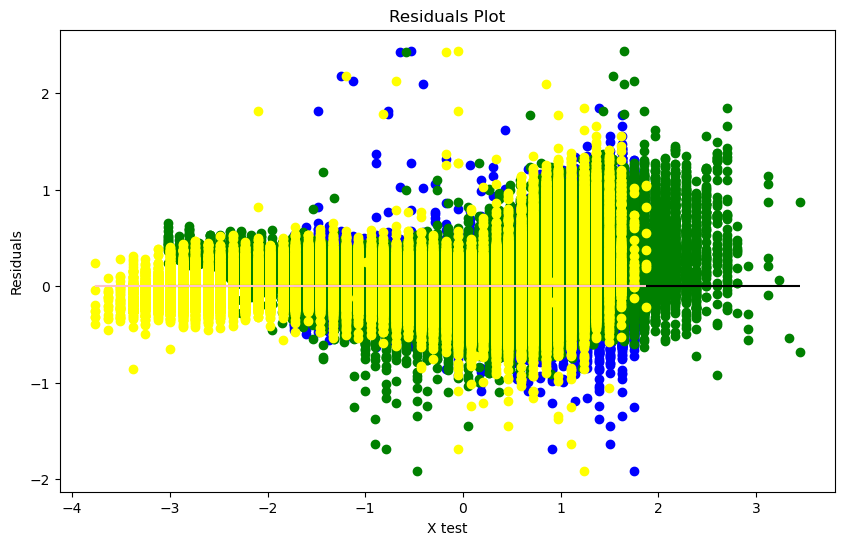

In [33]:
# Plot residuals
residuals = ytest - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(Xtest['Duration'], residuals, color='blue')
plt.scatter(Xtest['Heart_Rate'], residuals, color='green')
plt.scatter(Xtest['Body_Temp'], residuals, color='yellow')
plt.hlines(y=0, xmin=Xtest['Duration'].min(), xmax=Xtest['Duration'].max(), color='red')
plt.hlines(y=0, xmin=Xtest['Heart_Rate'].min(), xmax=Xtest['Heart_Rate'].max(), color='Black')
plt.hlines(y=0, xmin=Xtest['Body_Temp'].min(), xmax=Xtest['Body_Temp'].max(), color='pink')
plt.title('Residuals Plot')
plt.xlabel('X test')
plt.ylabel('Residuals')
plt.show()

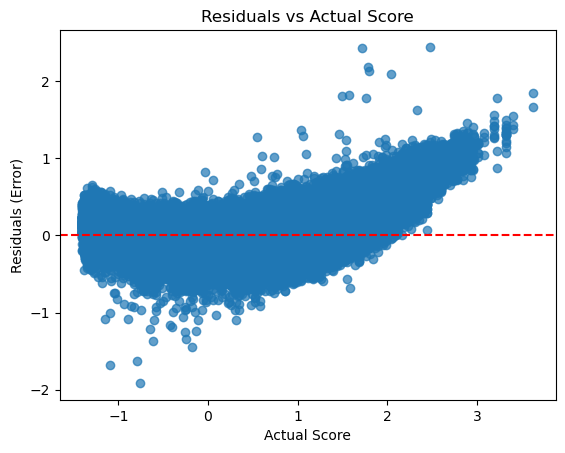

In [34]:
plt.scatter(ytest, residuals, alpha=0.7)
plt.xlabel('Actual Score')
plt.ylabel('Residuals (Error)')
plt.title('Residuals vs Actual Score')
plt.axhline(0, color='red', linestyle='--')
plt.show()

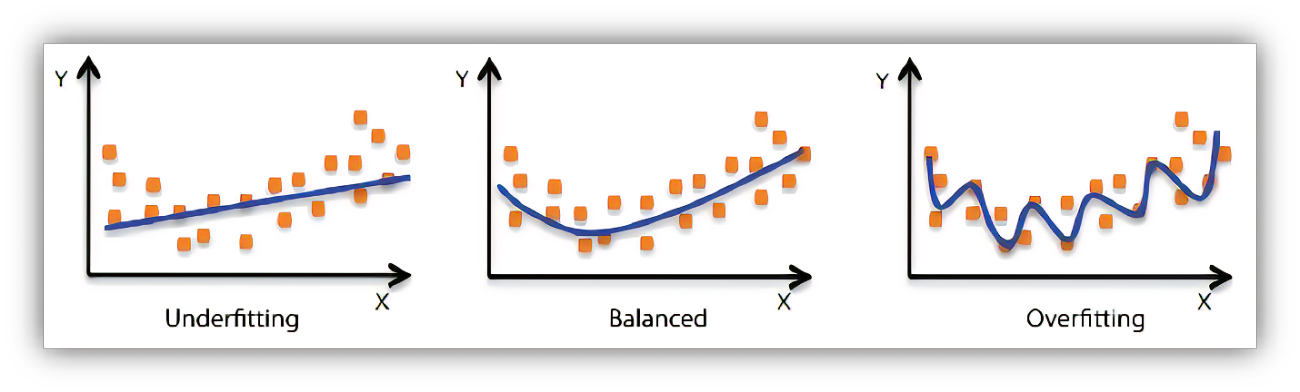

https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

## Random Forest

In [35]:
# Memabangun model random forest
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(Xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [36]:
# calculate mse for evaluation of Random Forest results
y_pred_test = model_rf.predict(Xtest)

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred_test)
from sklearn.metrics import r2_score

r2 = r2_score(ytest, y_pred_test)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.03256425386634821
R-squared: 0.9674357461336518


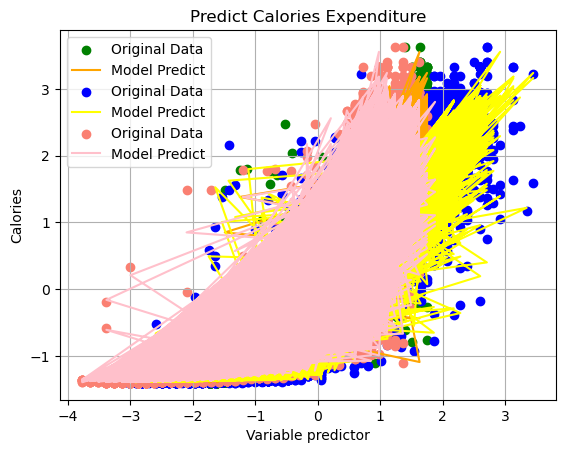

In [38]:
# Plot data test & predict
plt.scatter(Xtest['Duration'], ytest, color='green', label='Original Data')
plt.plot(Xtest['Duration'], y_pred_test, color='orange', label='Model Predict')
plt.scatter(Xtest['Heart_Rate'], ytest, color='blue', label='Original Data')
plt.plot(Xtest['Heart_Rate'], y_pred_test, color='yellow', label='Model Predict')
plt.scatter(Xtest['Body_Temp'], ytest, color='salmon', label='Original Data')
plt.plot(Xtest['Body_Temp'], y_pred_test, color='pink', label='Model Predict')

plt.xlabel('Variable predictor')
plt.ylabel('Calories')
plt.title('Predict Calories Expenditure')
plt.legend()
plt.grid(True)
plt.show()

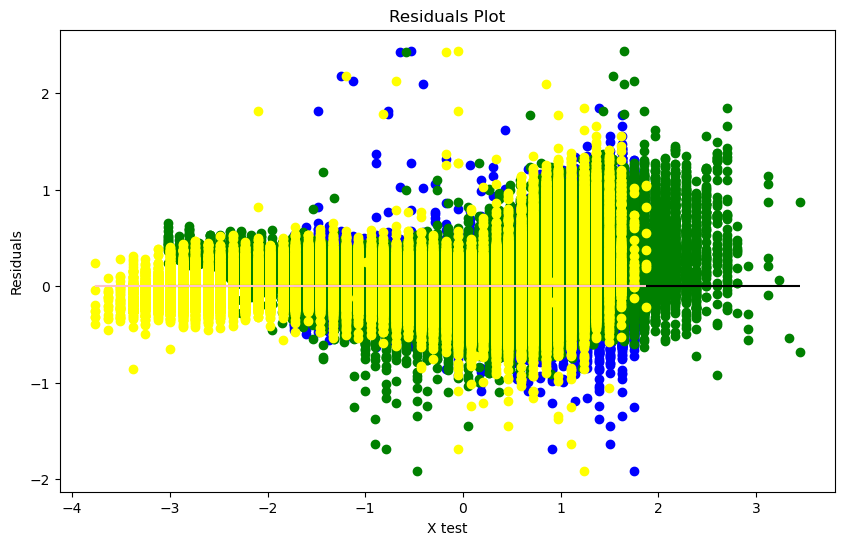

In [39]:
# Plot residuals
residuals = ytest - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(Xtest['Duration'], residuals, color='blue')
plt.scatter(Xtest['Heart_Rate'], residuals, color='green')
plt.scatter(Xtest['Body_Temp'], residuals, color='yellow')
plt.hlines(y=0, xmin=Xtest['Duration'].min(), xmax=Xtest['Duration'].max(), color='red')
plt.hlines(y=0, xmin=Xtest['Heart_Rate'].min(), xmax=Xtest['Heart_Rate'].max(), color='Black')
plt.hlines(y=0, xmin=Xtest['Body_Temp'].min(), xmax=Xtest['Body_Temp'].max(), color='pink')
plt.title('Residuals Plot')
plt.xlabel('X test')
plt.ylabel('Residuals')
plt.show()

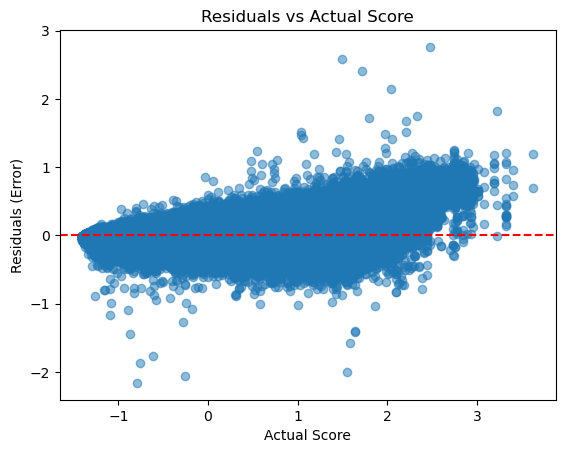

In [40]:
y_pred_test = y_pred_test.reshape(-1,1)
residuals = ytest - y_pred_test

plt.scatter(ytest, residuals, alpha=0.5)
plt.xlabel('Actual Score')
plt.ylabel('Residuals (Error)')
plt.title('Residuals vs Actual Score')
plt.axhline(0, color='red', linestyle='--')
plt.show()

## Comparing all predicted value results with ytest

In [41]:
ytest

array([[ 1.79553376],
       [-0.38904929],
       [-0.79062705],
       ...,
       [-0.8548795 ],
       [-0.82275328],
       [ 1.2654511 ]])

In [42]:
y_pred_test

array([[ 1.80473522],
       [-0.37336223],
       [-0.71729922],
       ...,
       [-0.84420797],
       [-0.79567474],
       [ 1.38733408]])

In [43]:
y_pred

array([[ 1.63952934],
       [-0.37843953],
       [-0.7470587 ],
       ...,
       [-0.65277497],
       [-0.78654319],
       [ 1.26670689]])

After building two machine learning models for calorie value prediction, I decided to use the results of the random forest model. This is because the Random Forest model has a higher r2 value (0.967), which shows that the model is able to capture data patterns better. In addition, I chose random forest because I wanted more accurate prediction results and based on the comparison I have done, the prediction results with random forest are closer to the test data. 

In [44]:
X_new = data_predict[['Duration', 'Heart_Rate', 'Body_Temp']]

In [45]:
y_pred_new = model_rf.predict(X_new).reshape(-1,1)
y_pred_new

array([[3.05872071],
       [3.05872071],
       [3.05872071],
       ...,
       [3.05872071],
       [3.05872071],
       [3.05872071]])

In [46]:
# Retrieve the column name
Calories = data_model[['Calories']] 

# convert y_pred_new result into y_predict datafram
y_predict = pd.DataFrame(y_pred_new, columns=Calories.columns)

# Create a new dataframe for data submission by deleting the previous Calories column and replacing the predicted Calories column
submission_data = submission_data.drop(columns=['Calories'])
submission_data['Calories'] = y_predict['Calories']
submission_data.head()

,id,Calories
0,750000,3.058721
1,750001,3.058721
2,750002,3.058721
3,750003,3.058721
4,750004,3.058721


In [47]:
y_predict.to_csv('submission_calories.csv')